# Homework 1. Exploratory Data Analysis

Due: Thursday, September 18, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW1.ipynb download=HW1.ipynb> Download this assignment</a>

---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data
For this assignment we will use two databases: 

1. The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please [read the documentation](http://seanlahman.com/files/database/readme2012.txt)."

2. [Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [62]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1

In Lecture 1, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared. 

#### Problem 1(a) 
Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the head of each table. 

**Hint** Use the [requests](http://docs.python-requests.org/en/latest/), [StringIO](http://docs.python.org/2/library/stringio.html) and [zipfile](https://docs.python.org/2/library/zipfile.html) modules to get from the web.  

In [63]:
import requests, zipfile, StringIO
r = requests.get("http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip")
z = zipfile.ZipFile(StringIO.StringIO(r.content))

salaries_data = pd.read_csv(z.open('Salaries.csv'))
teams_data = pd.read_csv(z.open('Teams.csv'))

In [65]:
print(salaries_data.shape)
salaries_data.head(10)

(23956, 5)


,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,murraed02,1472819
1,1985,BAL,AL,lynnfr01,1090000
2,1985,BAL,AL,ripkeca01,800000
3,1985,BAL,AL,lacyle01,725000
4,1985,BAL,AL,flanami01,641667
5,1985,BAL,AL,boddimi01,625000
6,1985,BAL,AL,stewasa01,581250
7,1985,BAL,AL,martide01,560000
8,1985,BAL,AL,roeniga01,558333
9,1985,BAL,AL,mcgresc01,547143


In [4]:
print(teams_data.shape)
teams_data.head()
#teams_data.iloc[:5, :10]

(2745, 48)


,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,PH1,PNA,NaN,1,28,NaN,21,7,...,NaN,0.84,Philadelphia Athletics,Jefferson Street Grounds,NaN,102,98,ATH,PH1,PH1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
3,1871,NaN,WS3,OLY,NaN,4,32,NaN,15,15,...,NaN,0.85,Washington Olympics,Olympics Grounds,NaN,94,98,OLY,WS3,WS3
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [5]:
salaries_data.describe()

,yearID,salary
count,23956.000000,23956.000000
mean,1999.419436,1864357.120220
std,8.045512,3079811.630009
min,1985.000000,0.000000
25%,1993.000000,250000.000000
50%,1999.000000,507950.000000
75%,2006.000000,2100000.000000
max,2013.000000,33000000.000000


In [6]:
#salaries_data.teamID.unique()
print(salaries_data.teamID.value_counts())

CLE    867
PHI    861
LAN    861
SLN    858
BAL    855
NYA    855
OAK    855
BOS    852
PIT    851
KCA    849
CIN    846
ATL    838
SDN    836
NYN    835
TEX    831
TOR    826
CHN    821
SFN    820
SEA    818
DET    817
CHA    812
HOU    805
MIN    778
COL    616
FLO    588
MON    577
ARI    458
TBA    455
MIL    452
ML4    381
CAL    368
WAS    260
LAA    256
ANA    247
MIA     51
dtype: int64


In [7]:
#salaries_data.lgID.unique()
print(salaries_data.lgID.value_counts())

NL    12212
AL    11744
dtype: int64


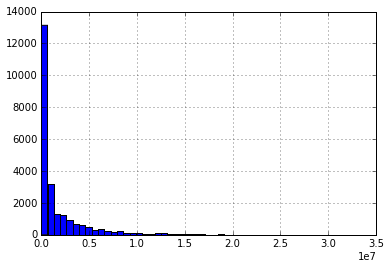

In [8]:
salaries_data.salary.hist(bins=50)

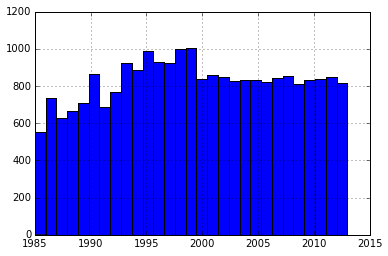

In [9]:
salaries_data.yearID.hist( bins = salaries_data.yearID.unique().size )

In [10]:
#gbyear = salaries_data.groupby('yearID')
#print(gbyear.get_group)
salaries_data['yearID'].value_counts()

1999    1006
1998     998
1995     986
1996     931
1997     925
1993     923
1994     884
1990     867
2001     860
2008     856
2012     848
2002     846
2007     842
2011     839
2000     836
2005     831
2004     831
2010     830
2003     827
2006     819
2013     815
2009     813
1992     769
1986     738
1989     711
1991     685
1988     663
1987     627
1985     550
dtype: int64

In [11]:
# how to make a bar plot of a categorical pandas df variable
#import seaborn as sns
#salaries_data.teamID
print(salaries_data.count())
salaries_data.columns

yearID      23956
teamID      23956
lgID        23956
playerID    23956
salary      23956
dtype: int64


Index([u'yearID', u'teamID', u'lgID', u'playerID', u'salary'], dtype='object')

#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

In [44]:
# show the total salaries for each team for each year
#sals = salaries_data.groupby('yearID').sum()
#print (sals.head())
team_year_salaries = salaries_data.groupby(['yearID', 'teamID'], as_index=False).sum()
team_year_salaries.head()

,yearID,teamID,salary
0,1985,ATL,14807000
1,1985,BAL,11560712
2,1985,BOS,10897560
3,1985,CAL,14427894
4,1985,CHA,9846178


#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame
showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

In [13]:
teams_salaries = pd.merge( 
    left = teams_data,
    right = team_year_salaries,
    on = ['teamID', 'yearID']
    )
print(teams_salaries.shape)
teams_salaries.head()

(828, 49)


,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,salary
0,1985,AL,TOR,TOR,E,1,161,80,99,62,...,0.98,Toronto Blue Jays,Exhibition Stadium,2468925,104,103,TOR,TOR,TOR,8812550
1,1985,AL,NYA,NYY,E,2,161,80,97,64,...,0.97,New York Yankees,Yankee Stadium II,2214587,98,97,NYY,NYA,NYA,14238204
2,1985,AL,DET,DET,E,3,161,81,84,77,...,0.97,Detroit Tigers,Tiger Stadium,2286609,100,98,DET,DET,DET,10348143
3,1985,AL,BAL,BAL,E,4,161,81,83,78,...,0.98,Baltimore Orioles,Memorial Stadium,2132387,97,97,BAL,BAL,BAL,11560712
4,1985,AL,BOS,BOS,E,5,163,81,81,81,...,0.97,Boston Red Sox,Fenway Park II,1786633,104,104,BOS,BOS,BOS,10897560


#### Problem 1(d)

How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 

**Hints**: Use a `for` loop to consider multiple years. Use the `teamID` (three letter representation of the team name) to save space on the plot.  

In [60]:
# Figure out min/max values for the axes in the selected year range
#yy = np.arange(1999, 2006)
#teams_salaries[teams_salaries.yearID in yy].salary.max()
#teams_salaries.yearID == 1985
#1985 in yy

False

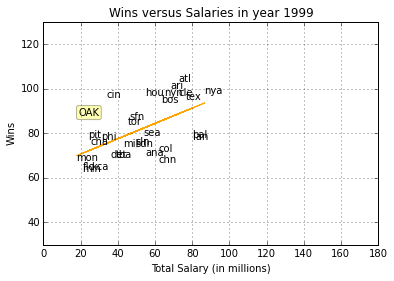

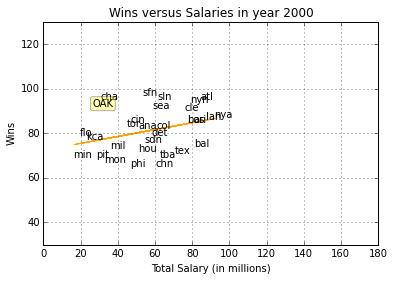

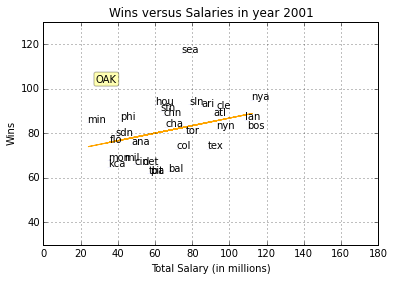

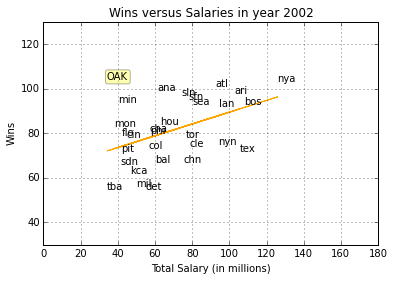

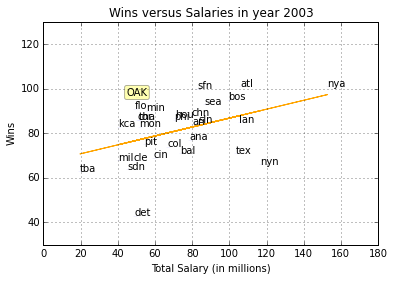

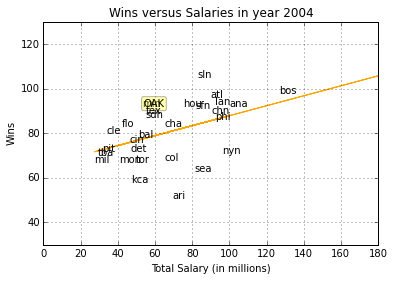

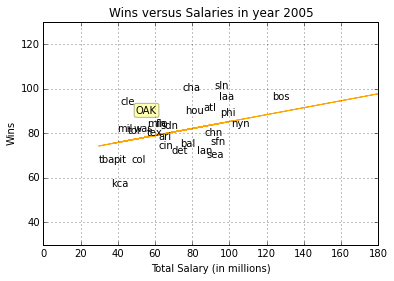

In [46]:
import statsmodels.api as sm
#import seaborn as sns

teamName = 'OAK'
years = np.arange(1999, 2006)

for year in years:
    one_year = teams_salaries[teams_salaries.yearID==year]
    one_year.salary = one_year.salary / 1e6

    fig, ax = plt.subplots()
    fit = np.polyfit(one_year.salary, one_year.W, deg=1)
    ax.plot(one_year.salary, fit[0] * one_year.salary + fit[1], color='orange')
    ax.scatter(one_year.salary, one_year.W, marker="_", alpha=0.05)

    plt.title('Wins versus Salaries in year ' + str(year))
    plt.xlabel('Total Salary (in millions)')
    plt.xlim(0,180)
    plt.ylabel('Wins')
    plt.ylim(30,130)
    plt.grid()
    for i, txt in enumerate(one_year.teamID):
        if txt == teamName:
            plt.annotate(txt, xy=(one_year.iloc[i].salary,one_year.iloc[i].W),
                        ha='center', va='bottom',
                        bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))
        else:
            plt.annotate(txt.lower(), xy=(one_year.iloc[i].salary,one_year.iloc[i].W))

    plt.show()

#### Problem 1(e):

**For AC209 Students**: Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d). 

In [16]:
#your code here

## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. 

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [29]:
#%ls '../homework-solutions/countries.csv'
#%pwd
#%ls "../../2014_data/countries.csv"

In [133]:
#url = "https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
#s = StringIO.StringIO(requests.get(url).content)
#countries = pd.read_csv(s)
countries = pd.read_csv("../../2014_data/countries.csv")

print(countries.shape)
countries.head()

(194, 2)


,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

In [134]:
income = pd.read_excel("http://spreadsheets.google.com/pub?key=0AkBd6lyS3EmpdHo5S0J6ekhVOF9QaVhod05QSGV4T3c&output=xls")
income.head()

,Income per person (fixed 2000 US$),1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1313.722725,1381.040832,1454.022854,1525.723589,1594.495067,1681.613910,1804.419415,1857.352947,1915.424459,1965.707230
4,Algeria,1280.384828,1085.414612,855.947986,1128.41578,1170.323896,1215.015783,1127.614288,1200.558225,1291.863983,...,1871.921986,1971.512803,2043.135713,2115.186028,2124.957754,2155.485231,2173.787903,2192.703976,2231.980246,2255.225482


Transform the data set to have years as the rows and countries as the columns. Show the head of this data set when it is loaded. 

In [135]:
# Make the countries as the index
income.index=income[income.columns[0]] 
income = income.drop(income.columns[0], axis = 1)
# Convert years from floats to ints
income.columns = map(lambda x: int(x), income.columns)

income = income.T
income.head()

Income per person (fixed 2000 US$),Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,Antarctica,"Virgin Islands, British",Hawaiian Trade Zone,U.S. Pacific Islands,Wake Island,Bonaire,Sark,Chinese Taipei,Saint Eustatius,Saba
1960,NaN,NaN,NaN,NaN,1280.384828,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,1085.414612,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,855.947986,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,1128.415780,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,1170.323896,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# relabel columns to country names (from 1-n indexes)
#income.columns = income.iloc[0, :]
# drop the old row that only had country names
#income = income.drop('Income per person (fixed 2000 US$)')

#### Problem 2(b)

Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000).  What kind of plot would be best? 

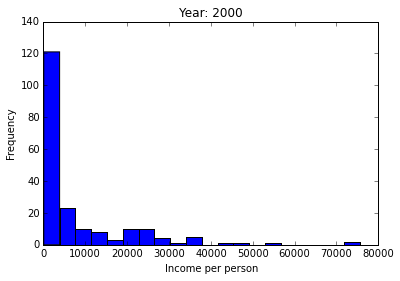

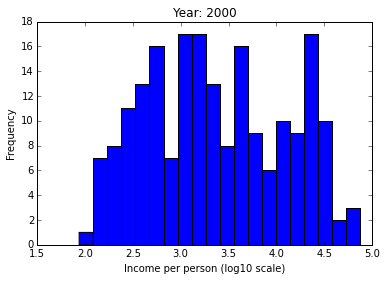

In [151]:
year = 2000
plt.plot(subplots=True)
plt.hist(income.ix[year].dropna().values, bins = 20)
plt.title('Year: %i' % year)
plt.xlabel('Income per person')
plt.ylabel('Frequency')
plt.show()

plt.hist(np.log10(income.ix[year].dropna().values), bins = 20)
plt.title('Year: %i' % year)
plt.xlabel('Income per person (log10 scale)')
plt.ylabel('Frequency')

plt.show()

#income[0:2]
#income[1962:1965]
#income[1962:1962]

#### Problem 2(c)

Write a function to merge the `countries` and `income` data sets for any given year. 

In [158]:
#income.ix[2000].T.head()

Income per person (fixed 2000 US$)
Abkhazia                              NaN
Afghanistan                           NaN
Akrotiri and Dhekelia                 NaN
Albania                       1200.137437
Algeria                       1794.405233
American Samoa                        NaN
Andorra                      17539.442005
Angola                         298.405843
Anguilla                              NaN
Antigua and Barbuda          10143.368076
Argentina                     7695.594073
Armenia                        621.424826
Aruba                        20589.771834
Australia                    21708.037256
Austria                      23974.183069
Azerbaijan                     655.097433
Bahamas                      21258.292430
Bahrain                      12489.467754
Bangladesh                     363.639927
Barbados                      9565.401228
Belarus                       1273.049124
Belgium                      22697.012303
Belize                        3329.663731

In [162]:
#countries.head()

,Country,Region
Country,,
Algeria,Algeria,AFRICA
Angola,Angola,AFRICA
Benin,Benin,AFRICA
Botswana,Botswana,AFRICA
Burkina,Burkina,AFRICA


In [231]:
"""
Function
--------
mergeByYear

Return a merged DataFrame containing the income, 
country name and region for a given year. 

Parameters
----------
year : int
    The year of interest

Returns
-------
a DataFrame
   A pandas DataFrame with three columns titled 
   'Country', 'Region', and 'Income'. 

Example
-------
>>> mergeByYear(2010)
"""
def mergeByYear(year):
    data = pd.DataFrame(income.ix[year].values, columns = ['Income'])
    data['Country'] = income.columns
#    countries.index = countries[countries.columns[0]]
    mergedCountriesIncome = pd.merge(data, countries, how = "inner", on = ['Country'])
    return mergedCountriesIncome

#mergeByYear(2003)

#### Problem 2(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years.  

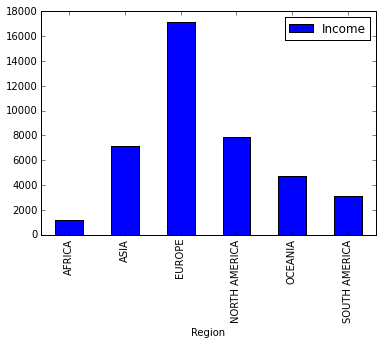

In [202]:
#your code here
y2003 = mergeByYear(2003)
gb2003 = y2003.groupby('Region').mean()
#plt.plot(gb2003, kind="bar")
gb2003.plot(kind="bar")

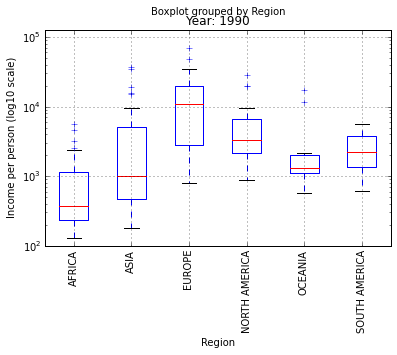

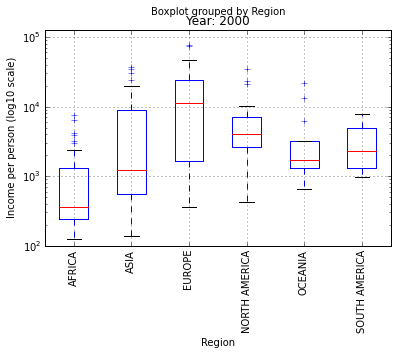

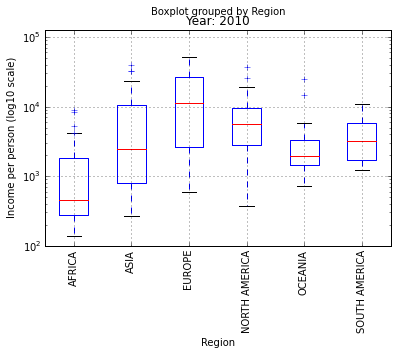

In [201]:
years = np.arange(1990, 2020, 10)
for yr in years:
    df = mergeByYear(yr)
    df.boxplot('Income', by = 'Region', rot = 90)
    plt.title('Year: ' + str(yr))
    plt.ylabel('Income per person (log10 scale)')
    plt.ylim(10**2, 10.5 **5)
    plt.yscale('log')
#    plt.boxplot(y2003.Income, labels = y2003.Country)

## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 3

In general, if group A has larger values than group B on average, does this mean the largest values are from group A? Discuss after completing each of the problems below. 

#### Problem 3(a)

Assume you have two list of numbers, X and Y, with distribution approximately normal. X and Y have standard deviation equal to 1, but the average of X is different from the average of Y.  If the difference in the average of X and the average of Y is larger than 0, how does the proportion of X > a compare to the proportion of Y > a? 

Write a function that analytically calculates the ratio of these two proportions: Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y. 

**Hint**: Use the `scipy.stats` module for useful functions related to a normal random variable such as the probability density function, cumulative distribution function and survival function. 

**Update**: Assume Y is normally distributed with mean equal to 0. 

Show the curve for different values of a (a = 2,3,4 and 5).

In [204]:
"""
Function
--------
ratioNormals

Return ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a) as function of 
    the difference in the average of X 
    and the average of Y. 

Parameters
----------
diff : difference in the average of X 
    and the average of Y. 
a : cutoff value

Returns
-------
Returns ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a)
    
Example
-------
>>> ratioNormals(diff = 1, a = 2)
"""
def ratioNormals(diff, a):
    X = scipy.stats.norm(loc=diff, scale=1)
    Y = scipy.stats.norm(loc=0, scale=1) 
    ratio = X.sf(a) / Y.sf(a)
    return ratio

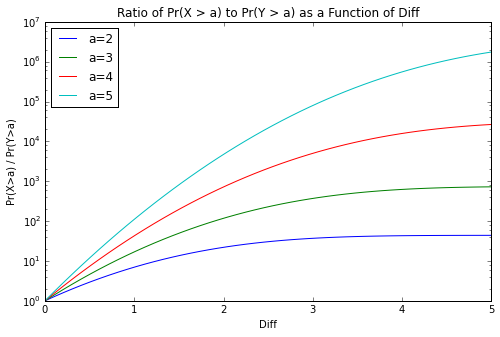

In [209]:
import scipy.stats
# let diff range from 0 to 5 
diffs = np.linspace(0, 5, 50)
a_values = range(2,6)

# Plot separate curves for 
# Pr(X > a) / Pr(Y > a) as a function of diff
# for all given values of a
plt.figure(figsize=(8,5));
for a in a_values:
    ratios = [ratioNormals(diff, a) for diff in diffs]
    plt.plot(diffs, ratios)
    
# Labels
plt.legend(["a={}".format(a) for a in a_values], loc=0);
plt.xlabel('Diff');
plt.ylabel('Pr(X>a) / Pr(Y>a)');
plt.title('Ratio of Pr(X > a) to Pr(Y > a) as a Function of Diff');

# Using a log scale so you can actually see the curves
plt.yscale('log')

#### Problem 3(b)

Now consider the distribution of income per person from two regions: Asia and South America. Estimate the average income per person across the countries in those two regions. Which region has the larger average of income per person across the countries in that region? 

**Update**: Use the year 2012. 

In [222]:
income.tail()
#income.ix[2000].values

Income per person (fixed 2000 US$),Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,Antarctica,"Virgin Islands, British",Hawaiian Trade Zone,U.S. Pacific Islands,Wake Island,Bonaire,Sark,Chinese Taipei,Saint Eustatius,Saba
2007,NaN,NaN,NaN,1681.613910,2155.485231,NaN,21495.805083,562.987685,NaN,13495.127466,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,NaN,1804.419415,2173.787903,NaN,21943.339898,622.566879,NaN,13352.168544,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,1857.352947,2192.703976,NaN,NaN,619.818580,NaN,11645.634909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,NaN,NaN,NaN,1915.424459,2231.980246,NaN,NaN,623.245275,NaN,10614.794315,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,1965.707230,2255.225482,NaN,NaN,629.955306,NaN,9977.957073,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [233]:
#data = pd.DataFrame(income.ix[2011].values, columns = ['Income'])
#data['Country'] = income.columns
#joined = pd.merge(data, countries, how="inner", on=['Country'])
#joined.Income = np.round(joined.Income, 2)
grouped = joined.groupby('Region').mean()
grouped.head()
#grouped.plot(kind="bar")
#grouped = 
#grouped.iloc[(grouped.Region == "Asia") | (grouped.Region == "SOUTH AMERICA")]
#['Region' == ['ASIA','AFRICA']].plot(kind="bar")

df = mergeByYear(2011)
grouped = df.groupby('Region').mean()
grouped.head()

,Income
Region,
AFRICA,1420.899501
ASIA,7969.958482
EUROPE,15166.635703
NORTH AMERICA,8773.337451
OCEANIA,5045.865379


#### Problem 3(c) 

Calculate the proportion of countries with income per person that is greater than 10,000 dollars. Which region has a larger proportion of countries with income per person greater than 10,000 dollars? If the answer here is different from the answer in 3(b), explain why in light of your answer to 3(a).

**Update**: Use the year 2012. 

In [26]:
#your code here

#### Problem 3(d)

**For AC209 Students**: Re-run this analysis in Problem 3 but compute the average income per person for each region, instead of the average of the reported incomes per person across countries in the region. Why are these two different? Hint: use this [data set](https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&gid=0). 

In [27]:
#your code here

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---
